## PHASE 1: BUSINESS UNDERSTANDING

Objectives:
1. To predict customer churn for a telecommunications company.
2. To analyze customer data to identify factors contributing to churn.
3. To gain insights from the analysis to develop retention strategies.

Hypothesis (Null and Alternative):
 
Null Hypothesis (H0):
There is no significant relationship between customer attributes and churn.
    
Alternative Hypothesis (H1):
Specific customer attributes significantly influence churn rates.


Business Questions:
1. What are the key factors that influence customer churn?
2. What is the relationship between monthly charges and customer churn?
3. What is the relationship between tenure and customer churn?
4. What is relationship between monthly charges, tenure and customer churn?
5. What is the lifetime value of each customer?
6. How can the company reduce the churn rate?
 



## PHASE 2: DATA UNDERSTANDING

a. Data Collection

In [8]:
#%pip install pyodbc  
#%pip install python-dotenv 
#%pip install nbformat --upgrade
#%pip show nbformat




In [9]:
# Importing standard libraries
import os
import warnings

# Importing third-party libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from scipy.stats import skew, kurtosis, ttest_ind
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix,
    mean_squared_error,
    mean_squared_log_error,
    r2_score,
    classification_report,
    accuracy_score,
    roc_auc_score
)
import joblib
from dotenv import dotenv_values
import pyodbc  # Database connection, use only if needed
import requests  # HTTP requests, use only if needed

# Configure Pandas display options for better readability
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

# Selectively suppress specific warnings instead of all warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Set up visualization style
sns.set(style="whitegrid")
plt.style.use("ggplot")


In [10]:
# loading the train dataset 1

df1 = pd.read_csv(r"c:\Users\GAMING\Downloads\DATA ANALYTICS AND AI - AZUBI AFRICA\Project 1\Datasets\Telco-churn-first-3000.csv")

df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2209-XADXF,Female,False,False,False,1,False,NaN,DSL,False,False,False,False,False,False,Month-to-month,False,Bank transfer (automatic),25.250000,25.250000,False
2996,6620-JDYNW,Female,False,False,False,18,True,True,DSL,True,False,True,False,False,False,Month-to-month,True,Mailed check,60.599998,1156.349976,False
2997,1891-FZYSA,Male,True,True,False,69,True,True,Fiber optic,False,True,False,False,True,False,Month-to-month,True,Electronic check,89.949997,6143.149902,True
2998,4770-UEZOX,Male,False,False,False,2,True,False,Fiber optic,False,True,False,False,False,False,Month-to-month,True,Electronic check,74.750000,144.800003,False


In [12]:
# Loading train dataset 2

df2 = pd.read_csv(r"c:\Users\GAMING\Downloads\DATA ANALYTICS AND AI - AZUBI AFRICA\Project 1\Datasets\LP2_Telco-churn-second-2000.csv")

df2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
2040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
2041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [13]:
# Loading the test dataset

test_data = pd.read_excel(r"c:\Users\GAMING\Downloads\DATA ANALYTICS AND AI - AZUBI AFRICA\Project 1\Datasets\Telco-churn-last-2000.xlsx")

test_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7912-SYRQT,Female,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95
1996,3557-HTYWR,Female,0,No,No,47,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.3
1997,4816-JBHOV,Male,1,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.7
1998,8920-NAVAY,Male,1,No,No,62,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35


b.  Data Description

Understand the features, types, and any data quality issues.

In [14]:
# Display summary statistics for numerical features- first dataset
df1.describe()


,tenure,MonthlyCharges,TotalCharges
count,3000.000000,3000.000000,2995.000000
mean,32.527333,65.347400,2301.278315
std,24.637768,30.137053,2274.987884
min,0.000000,18.400000,18.799999
25%,9.000000,35.787499,415.250000
50%,29.000000,70.900002,1404.650024
75%,56.000000,90.262501,3868.725098
max,72.000000,118.650002,8564.750000


In [15]:
# Display summary statistics for numerical features- second dataset

df2.describe()



,SeniorCitizen,tenure,MonthlyCharges
count,2043.000000,2043.000000,2043.000000
mean,0.168380,32.649046,64.712555
std,0.374295,24.376248,29.970010
min,0.000000,0.000000,18.550000
25%,0.000000,9.000000,35.825000
50%,0.000000,30.000000,70.250000
75%,0.000000,55.000000,89.625000
max,1.000000,72.000000,118.350000


In [16]:
# Display summary statistics for numerical features- test dataset
test_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,2000.000000,2000.000000,2000.000000
mean,0.161500,31.853000,63.933325
std,0.368084,24.632677,30.136858
min,0.000000,0.000000,18.250000
25%,0.000000,8.000000,34.250000
50%,0.000000,27.000000,69.800000
75%,0.000000,55.000000,89.275000
max,1.000000,72.000000,118.750000


In [17]:
# Display summary statistics for categorical features- first dataset
df1.describe(include=['O'])

,customerID,gender,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,Churn
count,3000,3000,2731,3000,2349,2349,2349,2349,2349,2349,3000,3000,2999
unique,3000,2,2,3,2,2,2,2,2,2,3,4,2
top,7590-VHVEG,Male,False,Fiber optic,False,False,False,False,False,True,Month-to-month,Electronic check,False
freq,1,1537,1437,1343,1478,1320,1296,1476,1190,1199,1641,1004,2219


In [18]:
# Display summary statistics for categorical features- second dataset
df2.describe(include=['O'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,2043,2043,2043,2043,2043,2043,2043,2043,2043,2043,2043,2043,2043,2043,2043,2043,2043,2043
unique,2043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,1991,2
top,5600-PDUJF,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,1022,1047,1412,1823,987,905,1029,911,923,996,828,831,1103,1220,696,5,1487


In [19]:
# Display summary statistics for categorical features- test dataset
test_data.describe(include=['O'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
count,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000.00
unique,2000,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,1930.00
top,7613-LLQFO,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.25
freq,1,1004,1056,1451,1807,966,848,991,857,876,1001,792,804,1131,1175,665,4.00


c. EDA and Data Cleaning 

In [20]:
# Check for missing values for first dataset
missing_values = df1.isnull().sum()
missing_values[missing_values > 0]


MultipleLines       269
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
TotalCharges          5
Churn                 1
dtype: int64

In [21]:
# Check for missing values for second dataset
missing_values = df2.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [22]:
# Check for missing values for test dataset
missing_values = test_data.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [23]:
# Fill missing values for categorical features with the most frequent value (mode) for fisrt dataset. The first dataset is the only dataset with missing values.
categorical_features_with_missing_values = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn'
]

for feature in categorical_features_with_missing_values:
    mode_value = df1[feature].mode()[0]
    df1[feature].fillna(mode_value, inplace=True)

# Fill missing values for numerical features with the median
numerical_features_with_missing_values = ['TotalCharges']

for feature in numerical_features_with_missing_values:
    median_value = df1[feature].median()
    df1[feature].fillna(median_value, inplace=True)

# Verify that all missing values are handled
missing_values_after = df1.isnull().sum()
missing_values_after[missing_values_after > 0]


Series([], dtype: int64)

In [24]:
# Replace spaces with NaN in 'TotalCharges' and convert to numeric
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'].replace(" ", pd.NA), errors='coerce')
df2['TotalCharges'] = pd.to_numeric(df2['TotalCharges'].replace(" ", pd.NA), errors='coerce')
test_data['TotalCharges'] = pd.to_numeric(test_data['TotalCharges'].replace(" ", pd.NA), errors='coerce')

# Fill missing values with median for 'TotalCharges'
df1['TotalCharges'].fillna(df1['TotalCharges'].median(), inplace=True)
df2['TotalCharges'].fillna(df2['TotalCharges'].median(), inplace=True)
test_data['TotalCharges'].fillna(test_data['TotalCharges'].median(), inplace=True)




In [25]:
# Concatenate the datasets
train_data = pd.concat([df1,df2], ignore_index=True)
print(train_data.info())
#print(train_data.head())
#print(train_data.tail())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     5043 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    5043 non-null   object 
 10  OnlineBackup      5043 non-null   object 
 11  DeviceProtection  5043 non-null   object 
 12  TechSupport       5043 non-null   object 
 13  StreamingTV       5043 non-null   object 
 14  StreamingMovies   5043 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [28]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

type_ = ["No", "Yes"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=train_data['Churn'].value_counts(), name="Churn"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.show()


i. Univariate Analysis

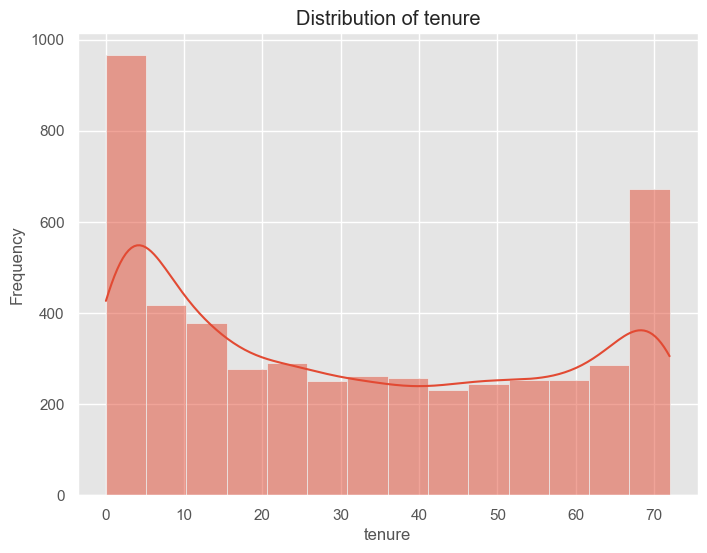

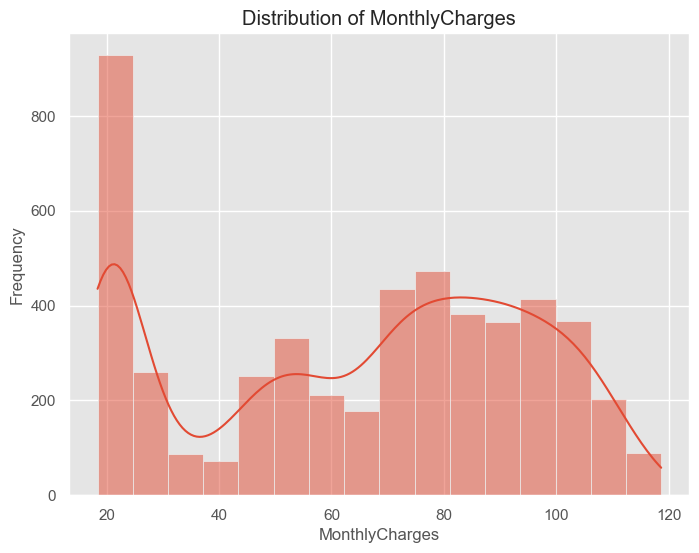

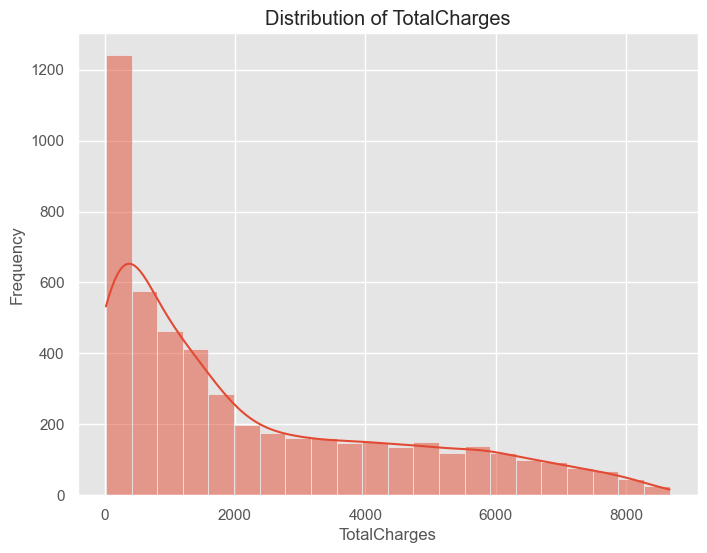

In [29]:
# Distribution plots for numerical features
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(train_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


Key Insights of Distribution Plots

Tenure:

Observation: There is a high number of customers with very short tenure (0-10 months) and a noticeable peak at the long tenure end (70+ months).

Insight: Many customers either leave very early or stay for a very long period.


MonthlyCharges:

Observation: Most customers have lower monthly charges, with smaller peaks at higher charge values.

Insight: The distribution is skewed towards lower monthly charges, indicating a larger customer base with basic or cheaper plans.


TotalCharges:

Observation: The total charges are heavily skewed to the right, with many customers having low total charges.

Insight: Many customers are relatively new or have not spent much over their tenure, which correlates with the high number of customers with low tenure

ii. Bivariate Analysis

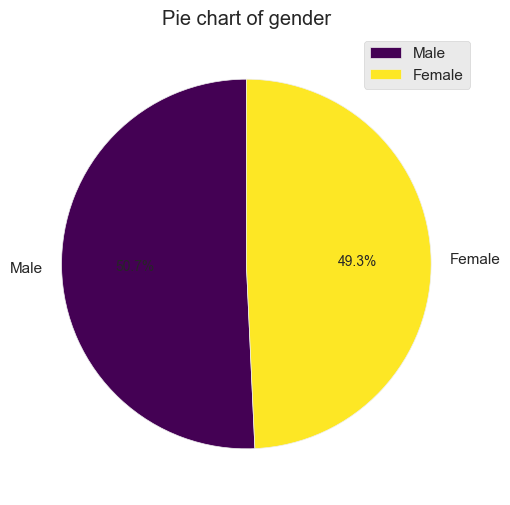

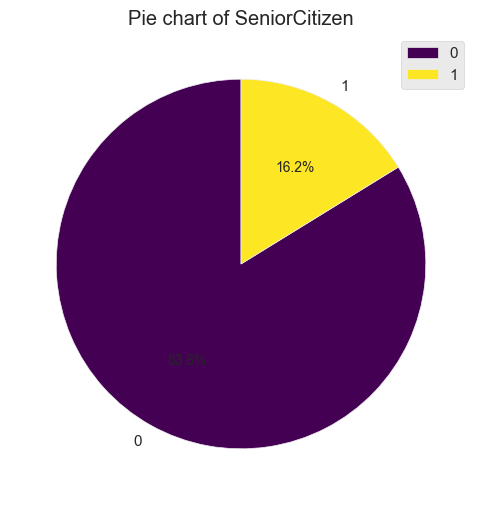

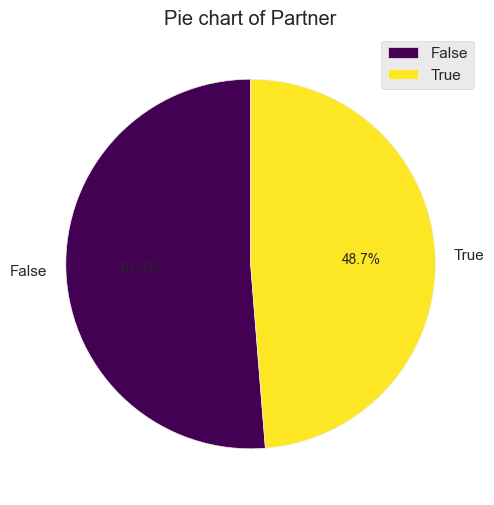

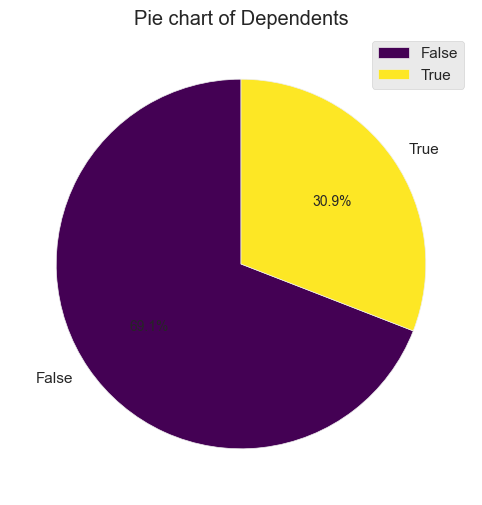

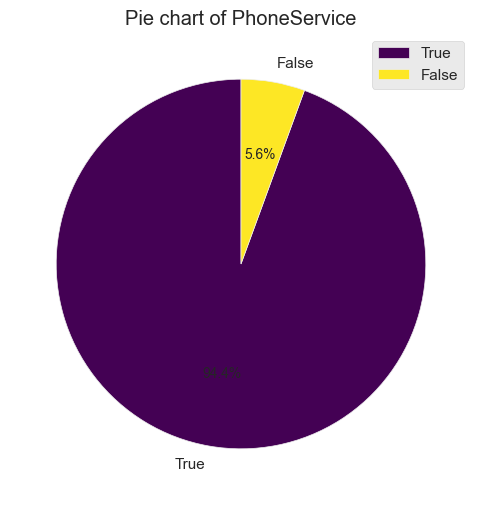

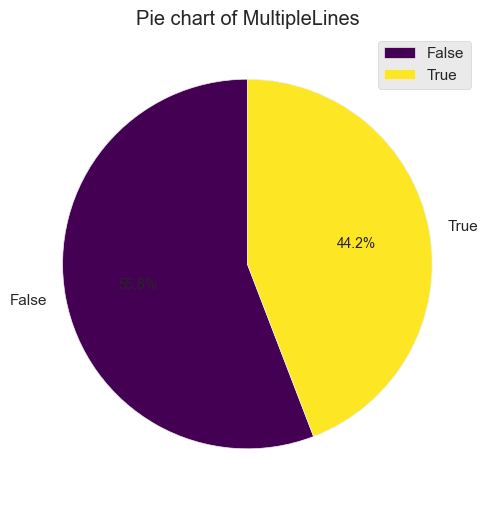

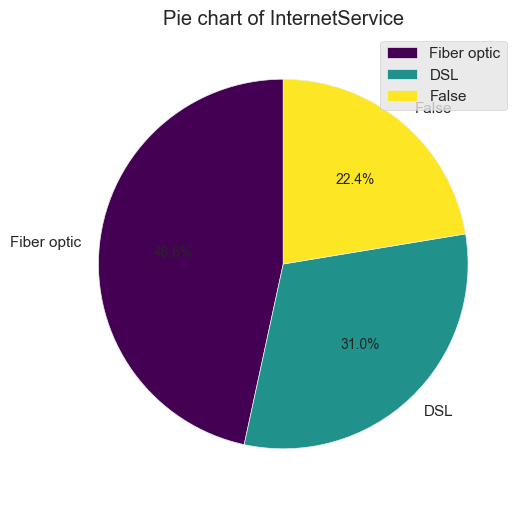

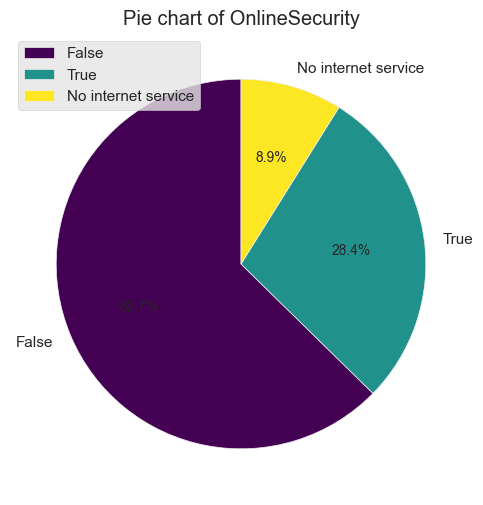

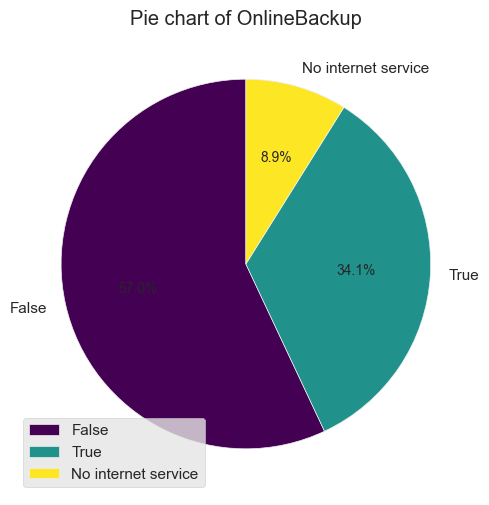

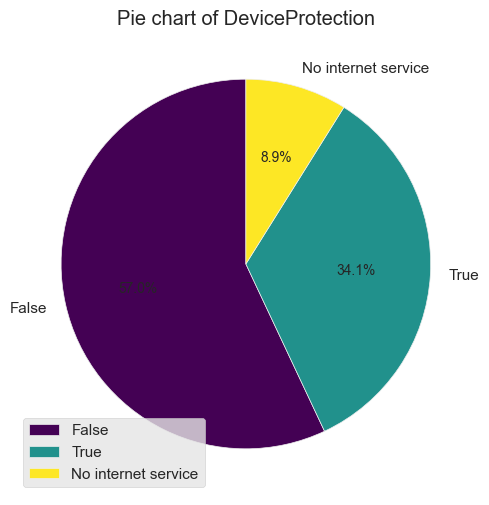

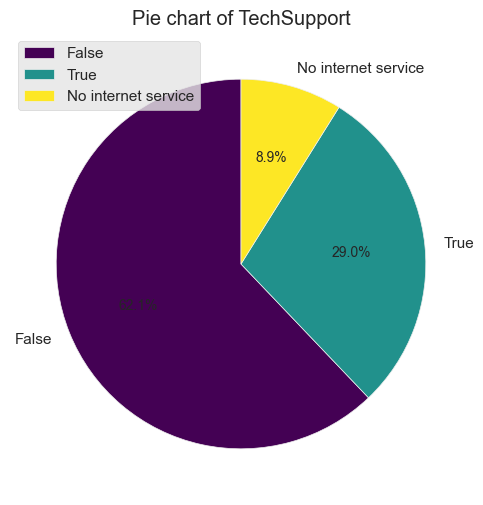

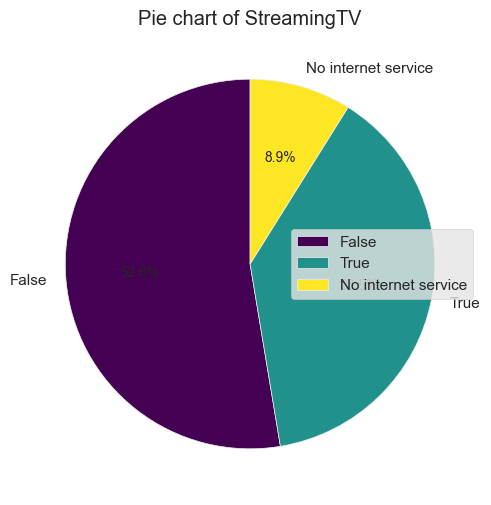

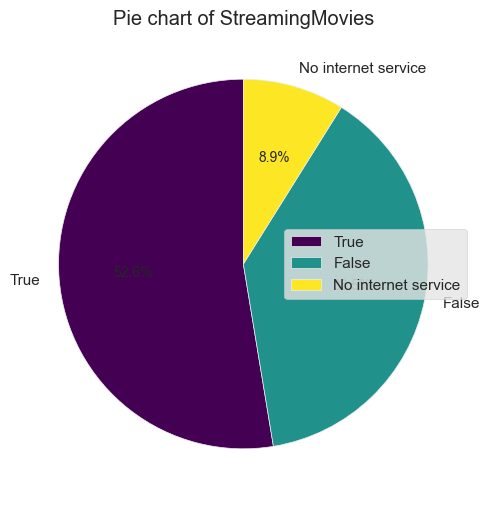

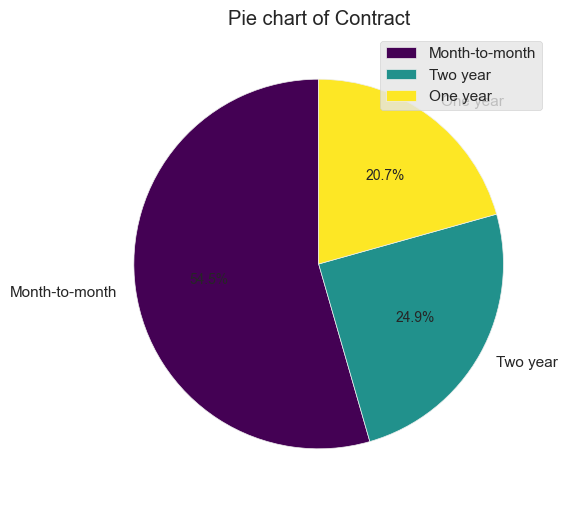

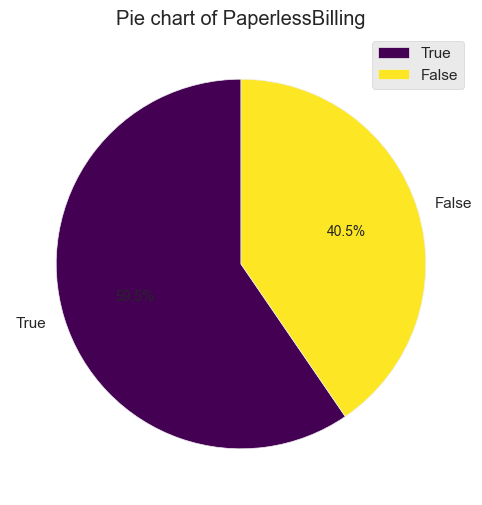

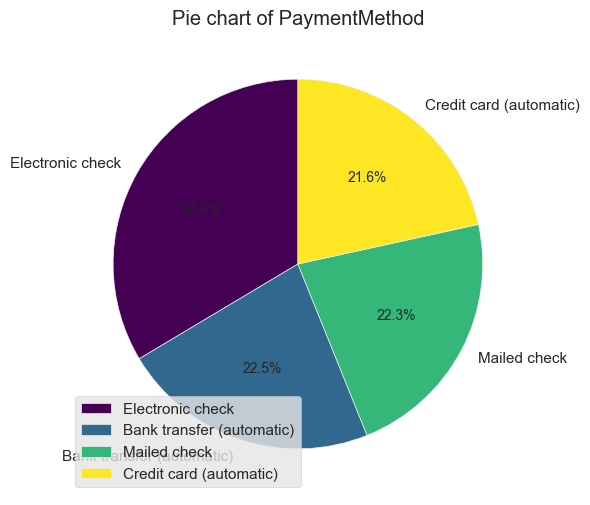

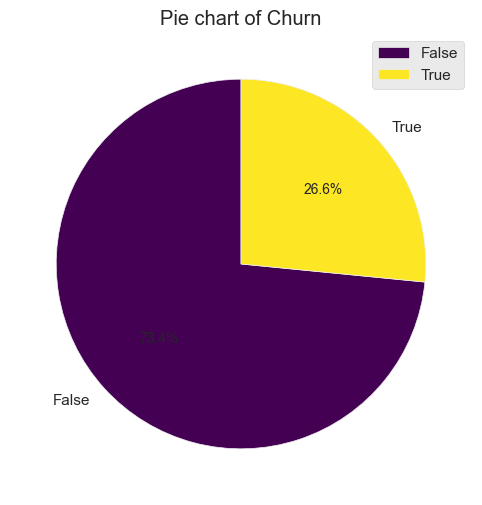

In [30]:
# Replace "No" with False and "Yes" with True
train_data.replace({"No": False, "Yes": True}, inplace=True)

# Remove rows where 'MultipleLines' is 'No phone service'
train_data= train_data[train_data['MultipleLines'] != 'No phone service']


# Count plots for categorical features: Provides the frequency distribution of categorical variables, highlighting the proportion of each category in the dataset.
categorical_columns = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

# Plot pie charts for categorical features
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    train_data[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis', legend=True)
    plt.title(f'Pie chart of {col}')
    plt.ylabel('') 
    plt.show()


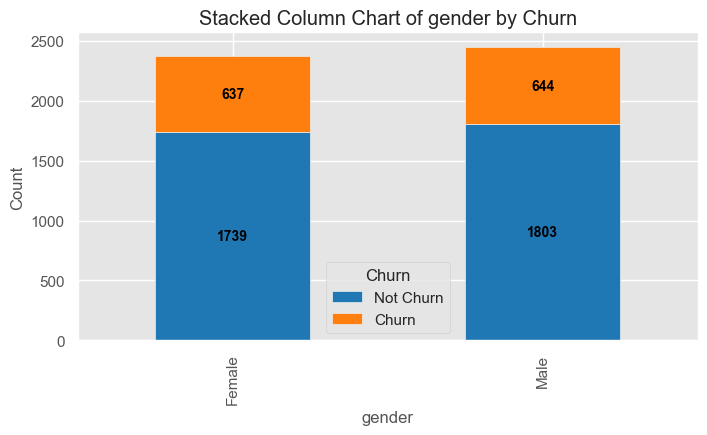

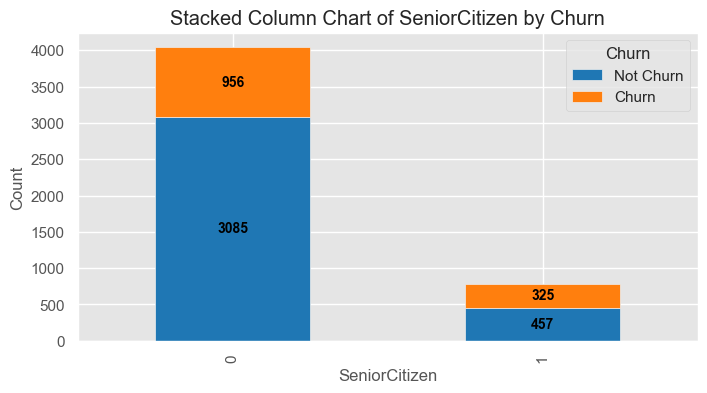

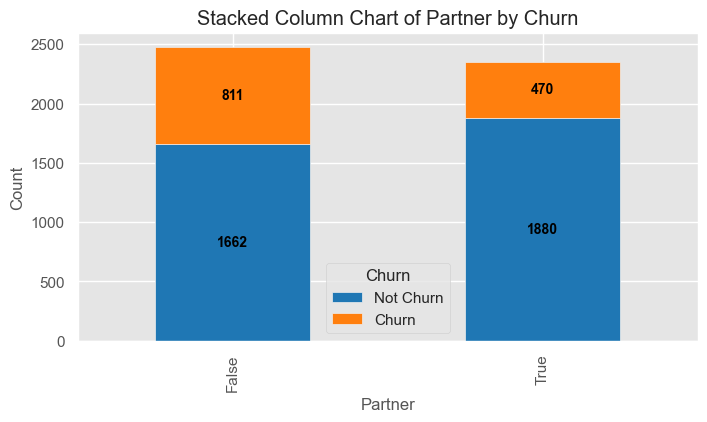

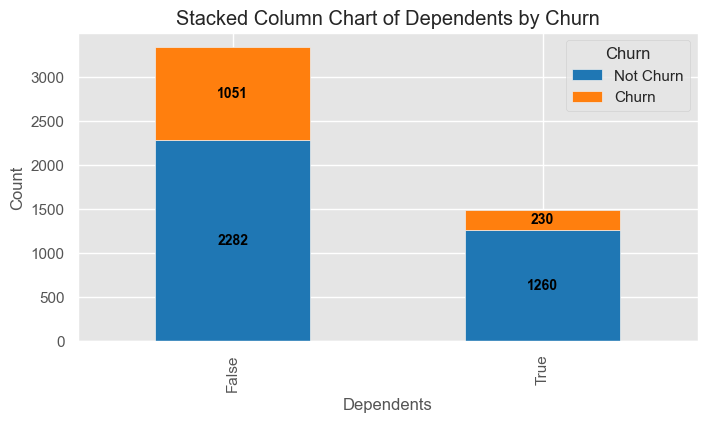

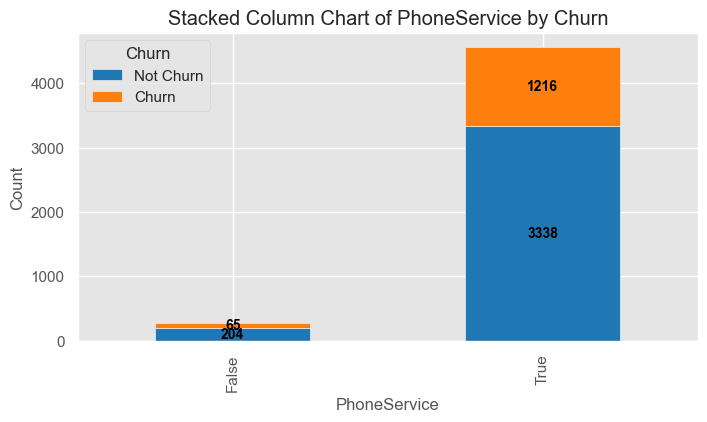

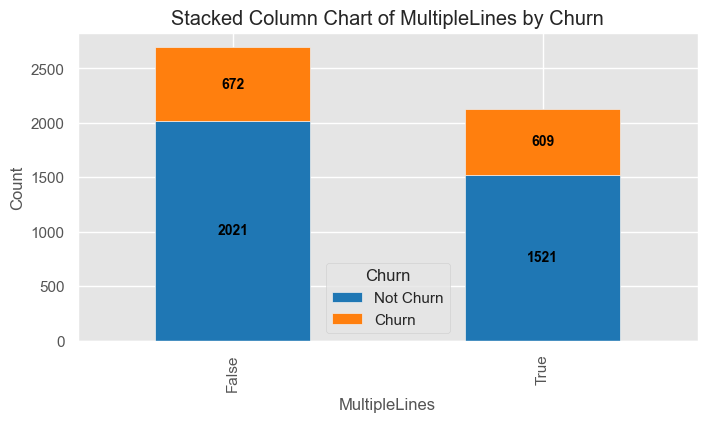

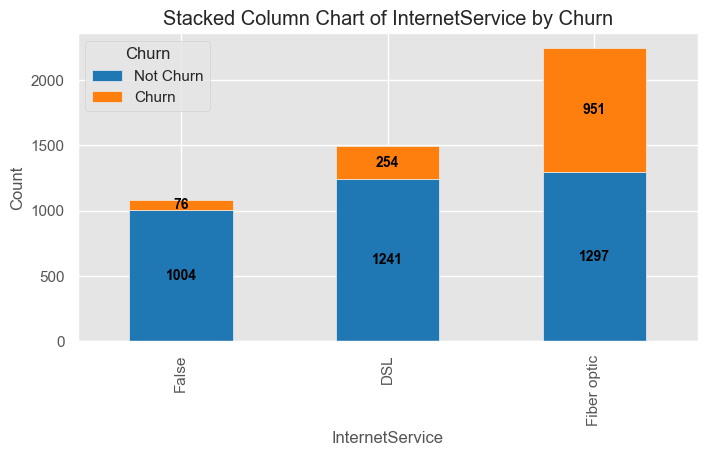

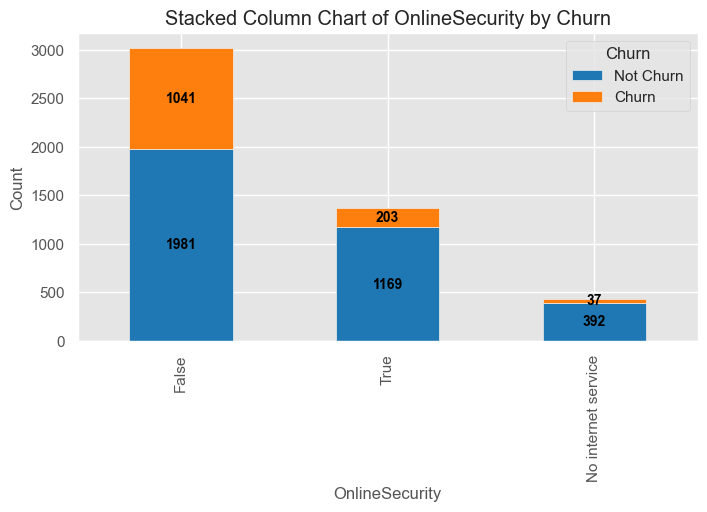

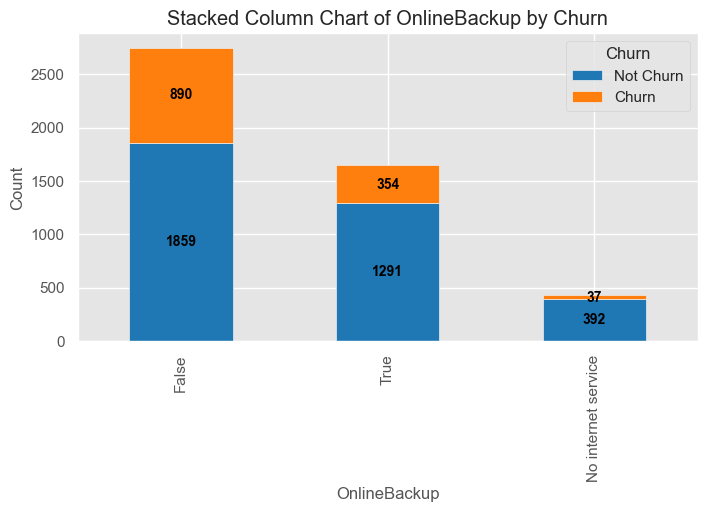

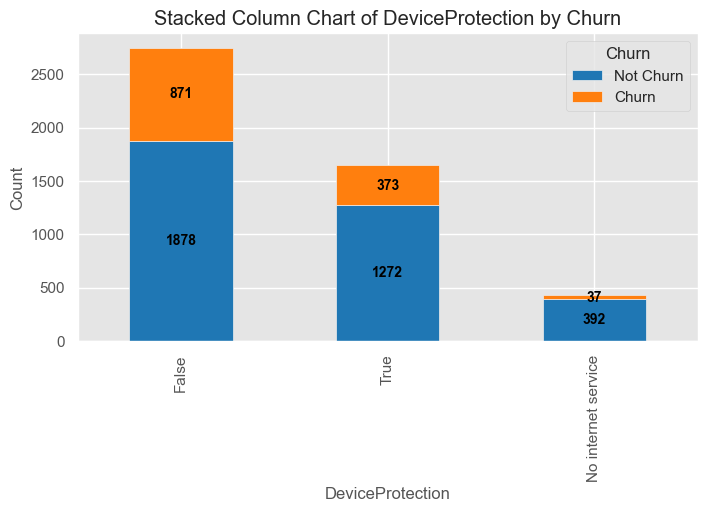

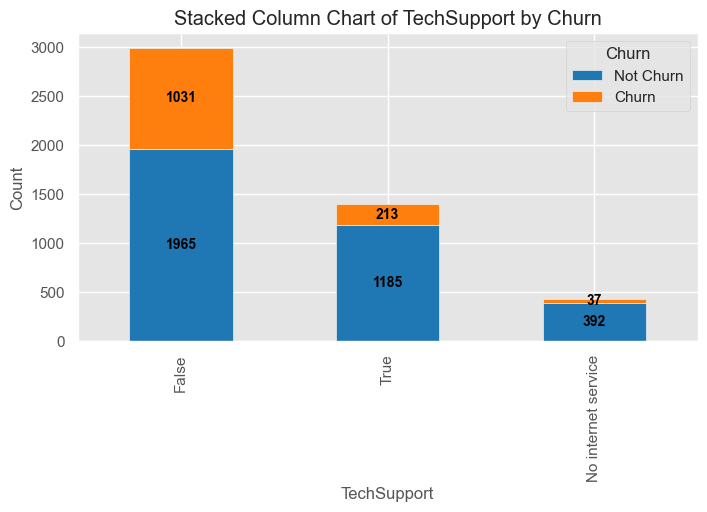

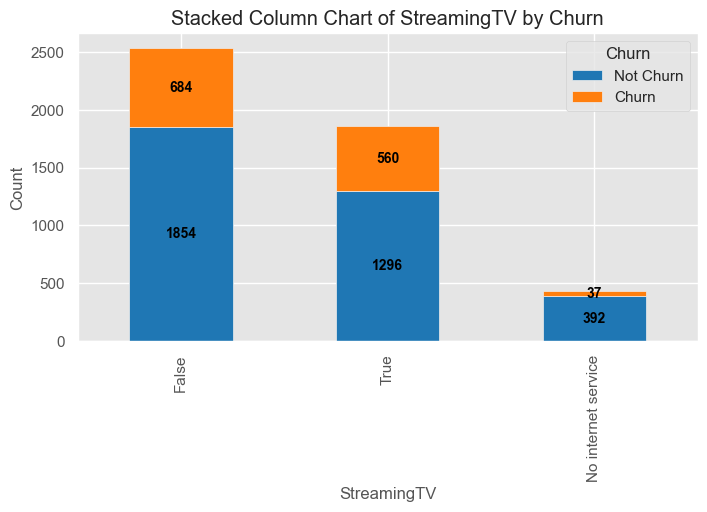

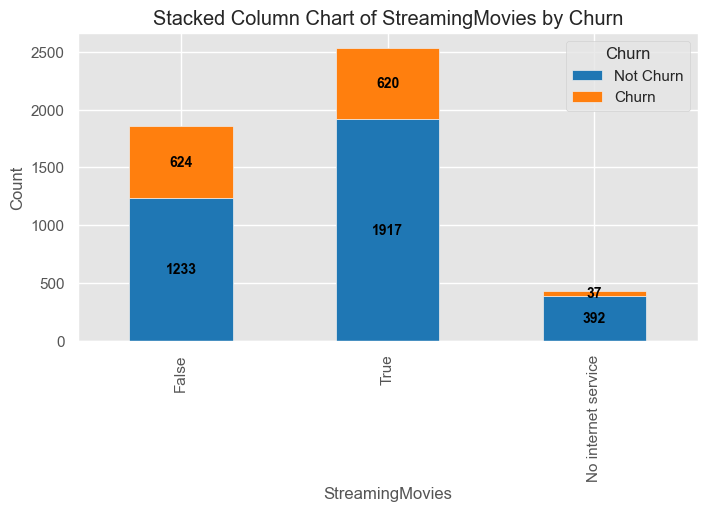

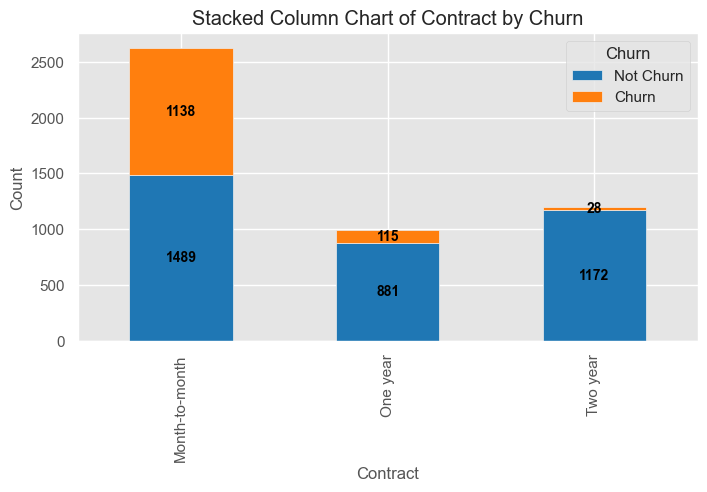

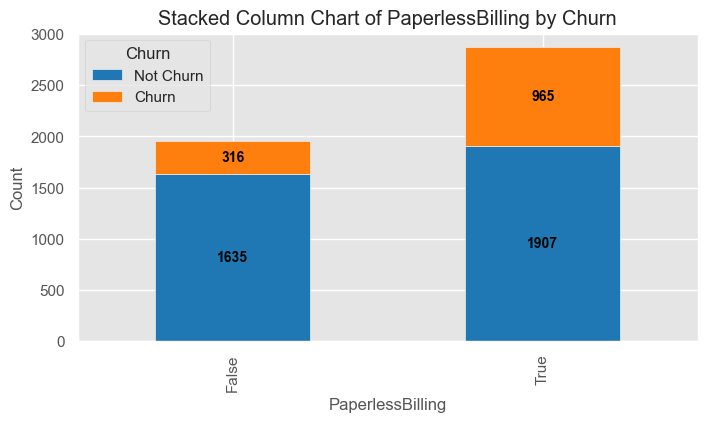

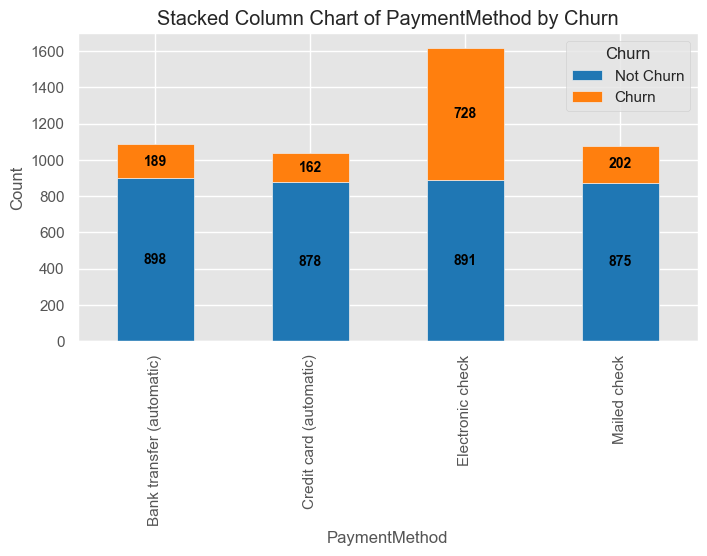

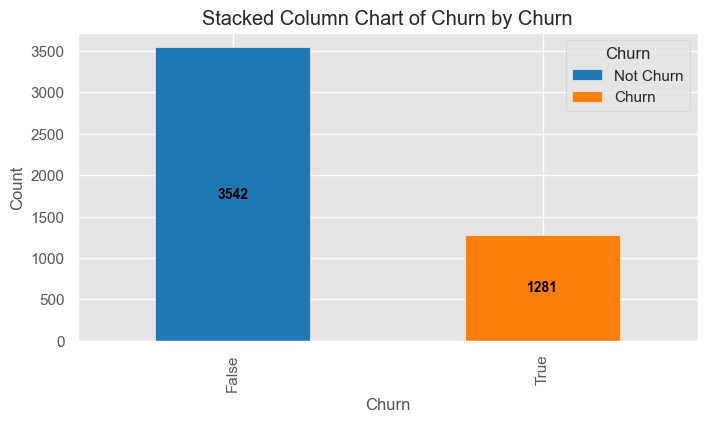

In [31]:
# Count plots for categorical features grouped by Churn
colors = ['#1f77b4', '#ff7f0e']

# Function to add data labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.0f}',
                ha='center', va='center',
                color='black', fontsize=10, fontweight='bold'
            )

# Plot stacked column charts for categorical features grouped by Churn
for col in categorical_columns:
    # Create a crosstab to get the counts
    crosstab = pd.crosstab(train_data[col], train_data['Churn'])
    
    # Plot the stacked bar chart
    ax = crosstab.plot(kind='bar', stacked=True, figsize=(8, 4), color=colors)

    # Add data labels
    for container in ax.containers:
        add_labels(container)
    
    plt.title(f'Stacked Column Chart of {col} by Churn')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Churn', labels=['Not Churn', 'Churn'])
    plt.show()


#### Key Insights of count plot for categorical features grouped by churn:

Gender: Slightly higher churn rates among men than women.

SeniorCitizen: Higher churn rates among senior citizens.

Partner: Customers without partners show higher churn rates.

Dependents: Customers without dependents show higher churn rates.

InternetService: Fiber optic users have higher churn rates compared to DSL and no internet service.



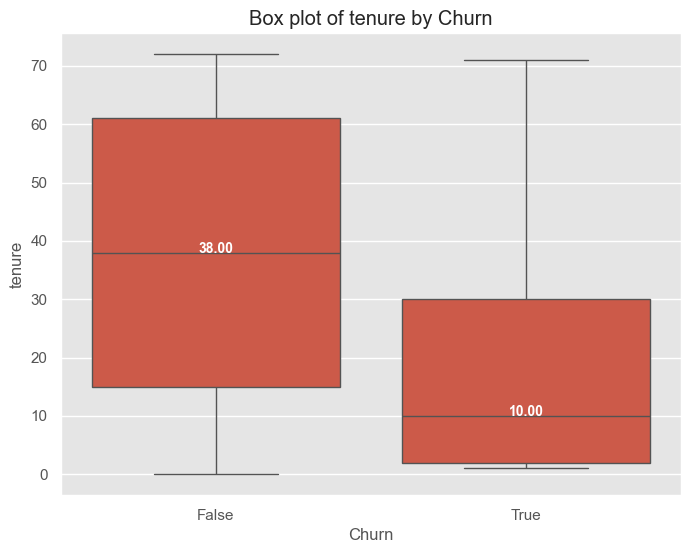

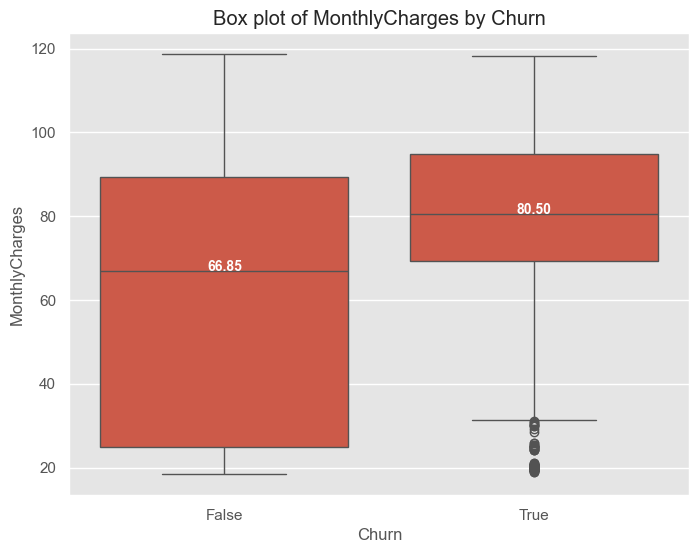

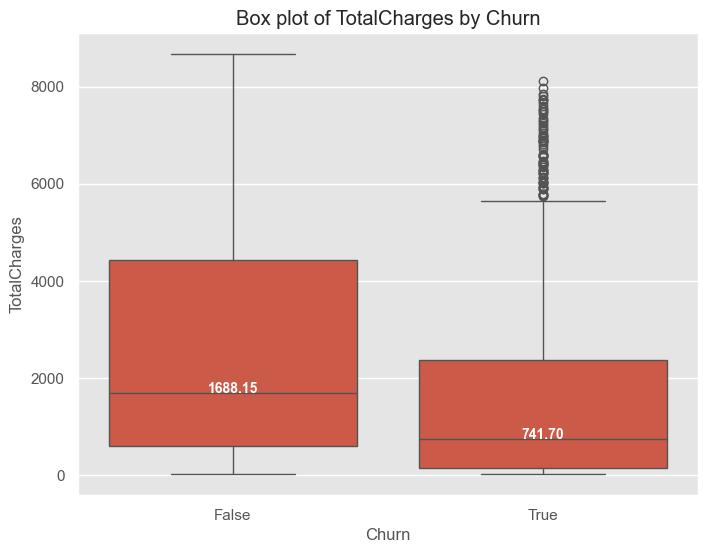

In [32]:
# Function to add data labels
def add_labels(ax):
    for patch in ax.patches:
        height = patch.get_height()
        if height > 0:
            ax.text(
                patch.get_x() + patch.get_width() / 2,
                height,
                f'{height:.2f}',
                ha='center', va='center',
                color='white', fontsize=10, fontweight='bold'
            )

# Plot box plots for numerical features grouped by Churn
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(data=train_data, x='Churn', y=col)
    
    # Add data labels for the median values
    medians = train_data.groupby(['Churn'])[col].median().values
    for xtick in ax.get_xticks():
        ax.text(
            xtick, 
            medians[xtick], 
            f'{medians[xtick]:.2f}', 
            horizontalalignment='center', 
            size='medium', 
            color='white', 
            weight='semibold'
        )
    
    plt.title(f'Box plot of {col} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.show()

### Key Insights of Box Plots for Numerical Features Grouped by Churn:

Tenure: Customers with shorter tenure are more likely to churn.

MonthlyCharges: Higher monthly charges are associated with higher churn rates.

TotalCharges: Lower total charges are associated with higher churn rates, likely due to shorter tenure.

iii. Multivariate Analysis

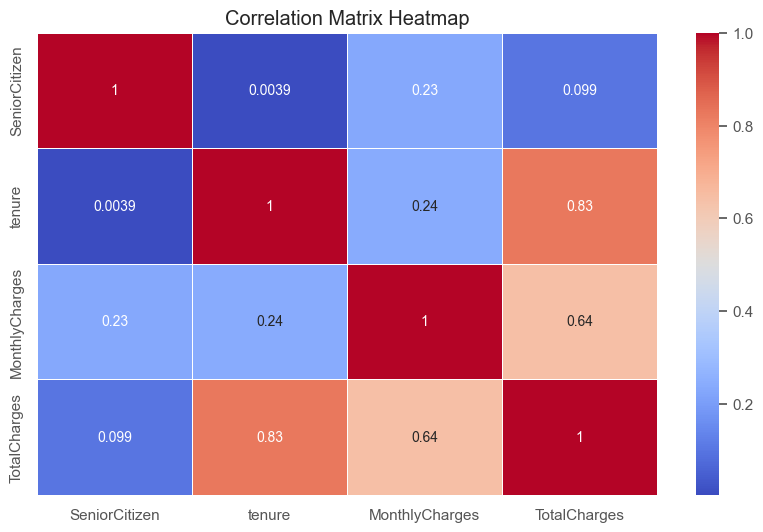

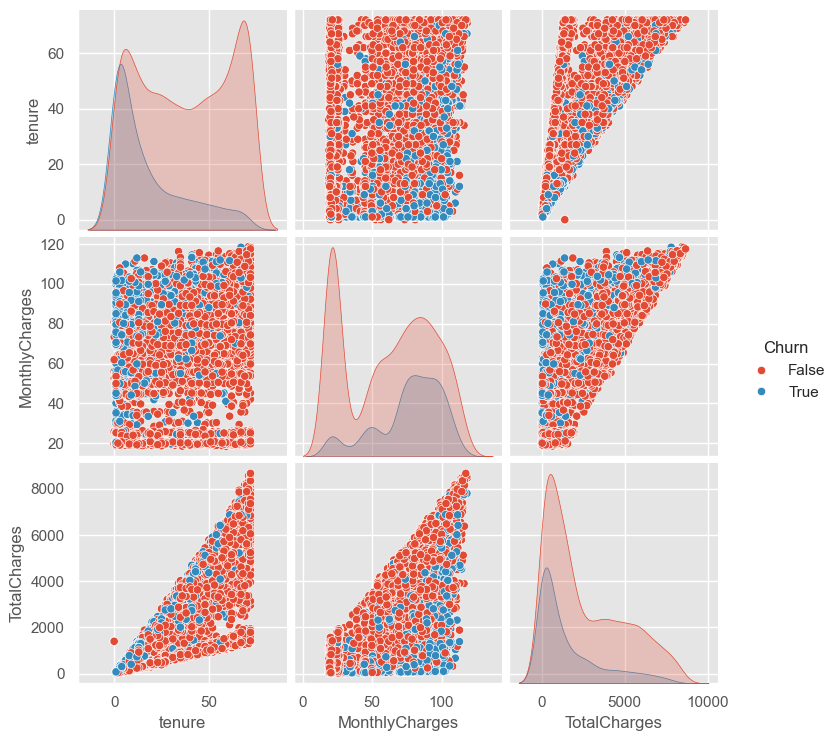

In [33]:
# Select only numeric columns for correlation matrix
numeric_df = train_data.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


# Pair plot for numerical features -Visualizes relationships between multiple numerical features and their distribution with respect to Churn.
sns.pairplot(train_data[numerical_columns + ['Churn']], hue='Churn')
plt.show()






Key Insights from Correlation Matrix Heatmap:

1. There is a strong correlation between tenure and TotalCharges. 


2. There is a relatively low correlation of SeniorCitizen with other features. This suggests that age alone is not a strong predictor of MonthlyCharges, tenure, or TotalCharges. 




Key Insights from Pair Plot for Numerical Features:

1. Churned customers (orange points) are more prevalent among those with shorter tenure and higher monthly charges.

2. Non-churned customers (blue points) tend to have a more even distribution across tenure, monthly charges, and total charges.




 What is the lifetime value of each customer?

count    4823.000000
mean     2334.184564
std      2295.868474
min         0.000000
25%       412.474995
50%      1403.149971
75%      3954.450000
max      8510.400000
Name: CLV, dtype: float64


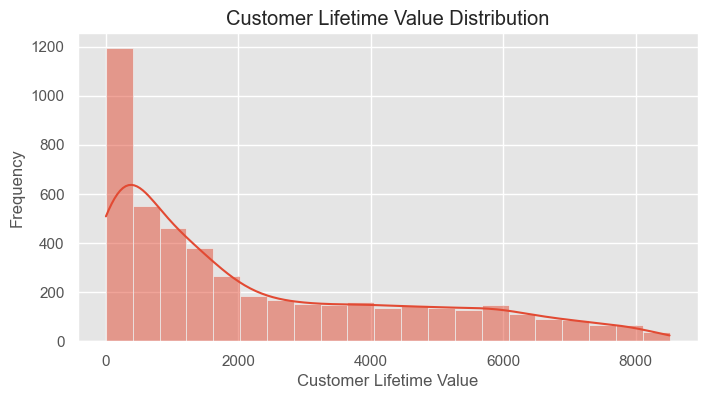

In [34]:
# Calculating Lifetime Value (CLV)
train_data['CLV'] = train_data['MonthlyCharges'] * train_data['tenure']

# Display summary statistics of CLV
print(train_data['CLV'].describe())

# Plot CLV distribution
plt.figure(figsize=(8, 4))
sns.histplot(train_data['CLV'], kde=True)
plt.title('Customer Lifetime Value Distribution')
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Frequency')
plt.show()


Answer:

## PHASE 3: BUILDING THE MODEL

a. Data Pre-processing

In [35]:

# Encoding categorical variables
train_data = pd.get_dummies(train_data, drop_first=True)

b. Model Training 

Here, we train 4 models; Logistic Regression, Decision Tree Classifier, Random Forest Classifier  and Support Vector Machine

In [36]:


# Split the data into training and validation sets
X = train_data.drop('Churn', axis=1)
y = train_data['Churn']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


log_reg = LogisticRegression(max_iter=1000)
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svc = SVC(probability=True)

# Train models
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svc.fit(X_train, y_train)



SVC(probability=True)

c. Model Evaluation 

Here, we evaluate the model using various metrics

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create a function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    return accuracy, precision, recall, f1, roc_auc

# Evaluate each model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = [log_reg, decision_tree, random_forest, svc]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']
results = {}

for model, name in zip(models, model_names):
    results[name] = evaluate_model(model, X_test, y_test)

# Display the results
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])
results_df


,Logistic Regression,Decision Tree,Random Forest,SVM
Accuracy,0.802073,0.738860,0.788601,0.704663
Precision,0.704348,0.566802,0.723757,0.000000
Recall,0.568421,0.491228,0.459649,0.000000
F1-Score,0.629126,0.526316,0.562232,0.000000
ROC-AUC,0.851200,0.666938,0.841752,0.809683


d. Model Selection

In [38]:
# Select the best model based on ROC-AUC
best_model_name = results_df.loc['ROC-AUC'].idxmax()
best_model = models[model_names.index(best_model_name)]

print(f"The best model is {best_model_name} with an ROC-AUC of {results_df.loc['ROC-AUC', best_model_name]:.2f}")


The best model is Logistic Regression with an ROC-AUC of 0.85


#### e. Model Evaluation

To evaluate the chosen model (Logistic Regression with an ROC-AUC of 0.85) in more detail, we c perform the following steps:

Confusion Matrix: Visualize the confusion matrix to understand the true positives, true negatives, false positives, and false negatives.

ROC Curve: Plot the ROC curve to visualize the performance of the model at different thresholds.

Precision-Recall Curve: Plot the precision-recall curve to understand the trade-off between precision and recall.

Detailed Metrics: Display detailed evaluation metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.

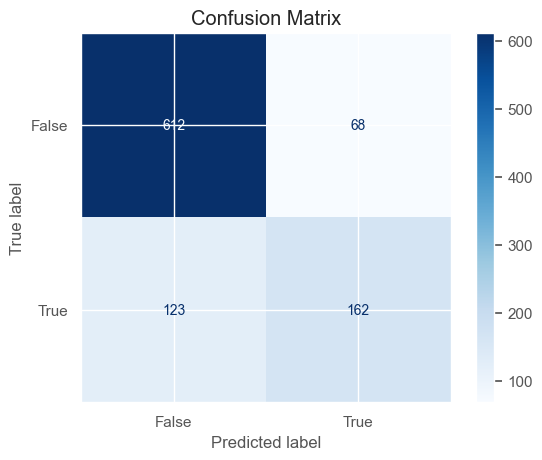

In [39]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Generate predictions
y_pred = best_model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


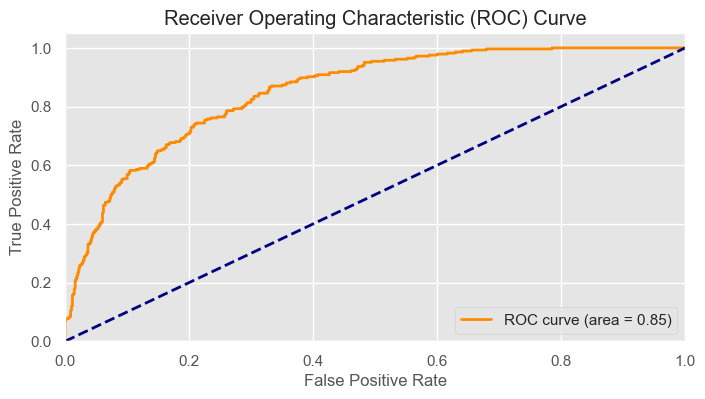

In [40]:
#ROC Curve
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area
y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


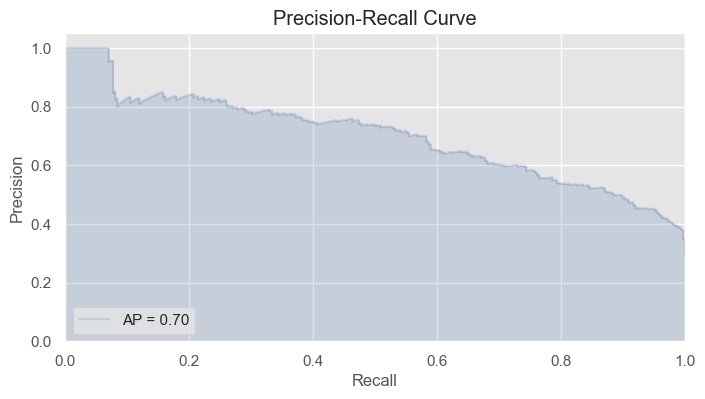

In [41]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 4))
plt.step(recall, precision, where='post', color='b', alpha=0.2, label=f'AP = {average_precision:.2f}')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


In [42]:
# Detailed Metrics

from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred, target_names=['Not Churn', 'Churn'])
print(report)



              precision    recall  f1-score   support

   Not Churn       0.83      0.90      0.87       680
       Churn       0.70      0.57      0.63       285

    accuracy                           0.80       965
   macro avg       0.77      0.73      0.75       965
weighted avg       0.79      0.80      0.80       965



In [44]:
import pickle


with open('Telco_churn_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Model saved as Telco_churn_model.pkl")



Model saved as Telco_churn_model.pkl


In [ ]:
feature_names = list(data_combined.columns)  # After applying pd.get_dummies
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(feature_names, f)